# Classifying digits using a convolutional neural network

In this practical exercice a convolutional neural network  is built using keras. It is then trained to classify image digits from the MNIST database.

Some baseline results:

| Method                                                                      | Test error (%) |
|-----------------------------------------------------------------------------|---------------:|
| Linear classifier (LeCun et al. 1998)                                       |           12.0 |
| K-nearest-neighbors, Euclidean (L2) (LeCun et al. 1998)                     |            5.0 |
| 3-layer NN, 500-300, softmax, cross entropy, weight decay (Hinton, 2005)    |            1.5 |
| Convolutional net LeNet-4 (LeCun et al. 1998)                               |            1.1 |
| Virtual SVM deg-9 poly [data augmentation] (LeCun et al. 1998)              |            0.8 |
| 6-layer NN with [data augmentation] (Ciresan et al. 2010)                   |           0.35 |
| Deep conv. net, 7 layers [data augmentation] (Ciresan et al. IJCAI 2011)    |           0.35 |

More results are available from: http://yann.lecun.com/exdb/mnist/

Try to improve on some of these results, at least on those that do not use data augmentation.

In [0]:
# Run code with tensorflow version 1.x
%tensorflow_version 1.x

import tensorflow.keras as keras
from keras.datasets import mnist as db
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

# Magic used by the notebook to show figures inline
%matplotlib inline
# matplotlib default values
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading packages
%load_ext autoreload
%autoreload 2

# Run code with tensorflow version 1.x
%tensorflow_version 1.x

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Class:  4


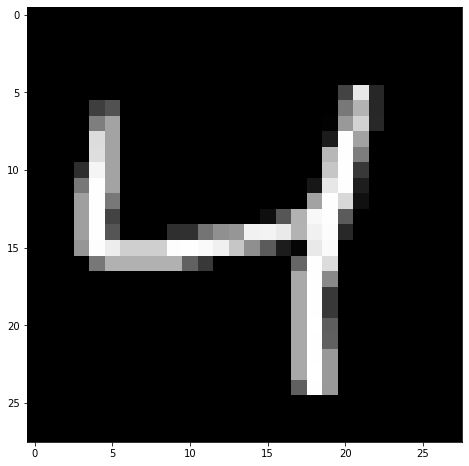

In [0]:
# Load and have a look at the data
(x, y), (x_test, y_test) = db.load_data()

# Visualize a single digit, with its class
index = 2
plt.imshow(x[index])
print("Class: ", y[index])



In [0]:
# Data management
from keras import backend as K
print(K.image_data_format())

nb_samples = x.shape[0]
val_nb = 5000  # number of validation samples
if val_nb > nb_samples:
    raise ValueError("You need some samples to train your network!")

img_rows, img_cols = x.shape[1:3]  # input image dimensions

x = x.reshape(nb_samples, img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x = x.astype('float32')
x_test = x_test.astype('float32')
x /= 255
x_test /= 255

x_val = x[:val_nb, ]
x_train = x[val_nb:, ]
y_val = y[:val_nb]
y_train = y[val_nb:]

print(x_train.shape, 'x train samples')
print(x_val.shape, 'x val samples')
print(x_test.shape, 'x test samples')
print(y_train.shape, 'y train samples')
print(y_val.shape, 'y val samples')
print(y_test.shape, 'y test samples')

# convert class vectors to binary class matrices
num_classes = max(y) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

channels_last
(55000, 28, 28, 1) x train samples
(5000, 28, 28, 1) x val samples
(10000, 28, 28, 1) x test samples
(55000,) y train samples
(5000,) y val samples
(10000,) y test samples


# Model definition

The following model uses keras to build a convolutional network. It has to respect some constraints:

- The input shape has to match the size of each input sample. 
- The ouptput should be of size 10 (num_classes)

Other than that, feel free to modify the architecture and its parameters.

In [0]:
filters0 = 32
nb_dense = 128

model = Sequential()
model.add(Conv2D(filters0, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(filters0 * 2, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(nb_dense, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
____________________________________________

# Model training



In [0]:
from keras.optimizers import SGD
batch_size = 128
epochs = 10
learning_rate = 0.1

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=learning_rate),
              metrics=['accuracy'])

output = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   validation_data=(x_val, y_val),
)


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 125us/step - loss: 0.3573 - acc: 0.8904 - val_loss: 0.1224 - val_acc: 0.9664
Epoch 2/10
55000/55000 [==============================] - 6s 117us/step - loss: 0.0992 - acc: 0.9703 - val_loss: 0.0693 - val_acc: 0.9798
Epoch 3/10
55000/55000 [==============================] - 6s 117us/step - loss: 0.0610 - acc: 0.9812 - val_loss: 0.0588 - val_acc: 0.9830
Epoch 4/10
55000/55000 [==============================] - 6s 117us/step - loss: 0.0436 - acc: 0.9862 - val_loss: 0.0486 - val_acc: 0.9850
Epoch 5/10
55000/55000 [==============================] - 6s 117us/step - loss: 0.0341 - acc: 0.9895 - val_loss: 0.0541 - val_acc: 0.9848
Epoch 6/10
55000/55000 [==============================] - 6s 117us/step - loss: 0.0276 - acc: 0.9911 - val_loss: 0.0495 - val_acc: 0.9850
Epoch 7/10
55000/55000 [==============================] - 6s 117us/step - loss: 0.0210 - acc: 0.9933 - val_loss: 0.0548 - v

# Analysis of the results

Visualizing what is going on is extremely important. For that:

- inspecting traning and validation performance is essential;

- looking at the errors might also be interesting.

Is there overfitting? How can it be reduced?
Is the network 'confident' when making errors?


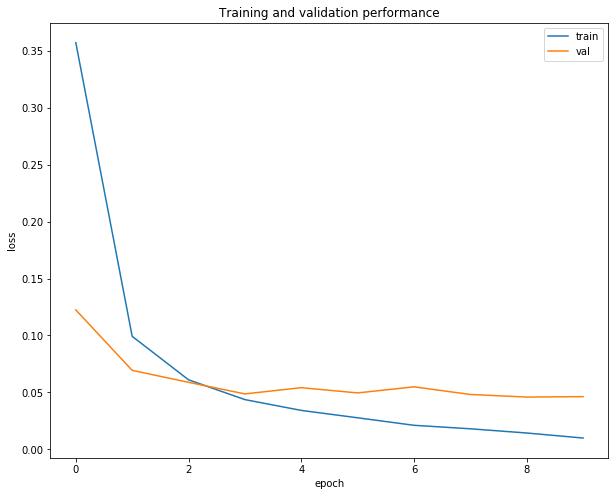

In [0]:
# Plotting the performance of our network
plt.plot(output.epoch, output.history['loss'], label='train')
plt.plot(output.epoch, output.history['val_loss'], label='val')
plt.title('Training and validation performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
# plt.ylim(0.2, 0.8)

# Plotting activations of the neurons

Given a certain input is possible to show the activations of the neurons of the convolutional layers. 

Class:  [4]


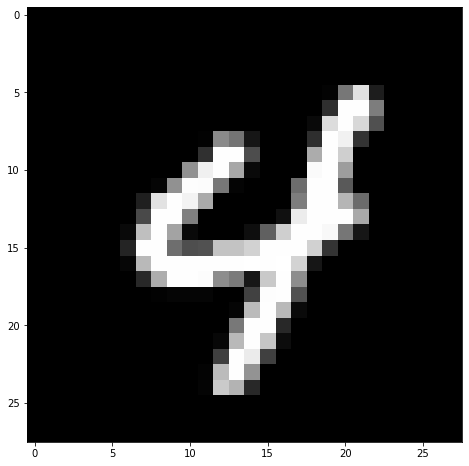

In [0]:
# taking a random sample from the training data
index = np.random.randint(0, len(x_train))
sample = x_train[index]

plt.imshow(sample[:,:,0])
print("Class: ", np.arange(num_classes)[y_train[index].astype('bool')])

In [0]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(sample.reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap=plt.cm.bwr)
            ax[row][col].axis('off')
            activation_index += 1
        
        


Activations values in the first convolutional layer


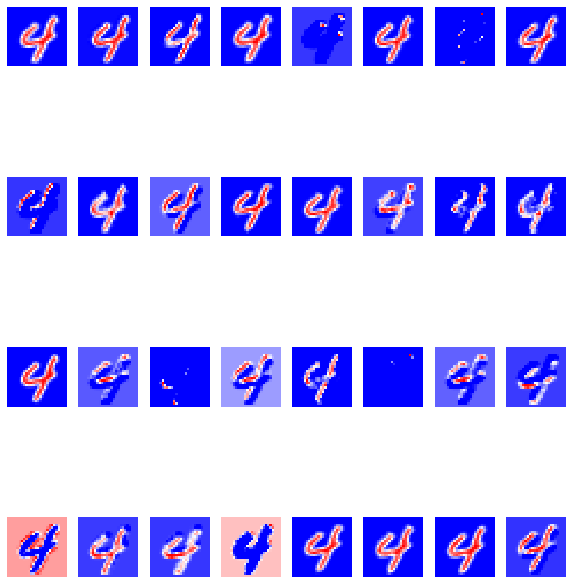

In [0]:
# display activation layer of the first filter
print('Activations values in the first convolutional layer')
display_activation(activations, 8, 4, 0)

Activations values in the second convolutional layer


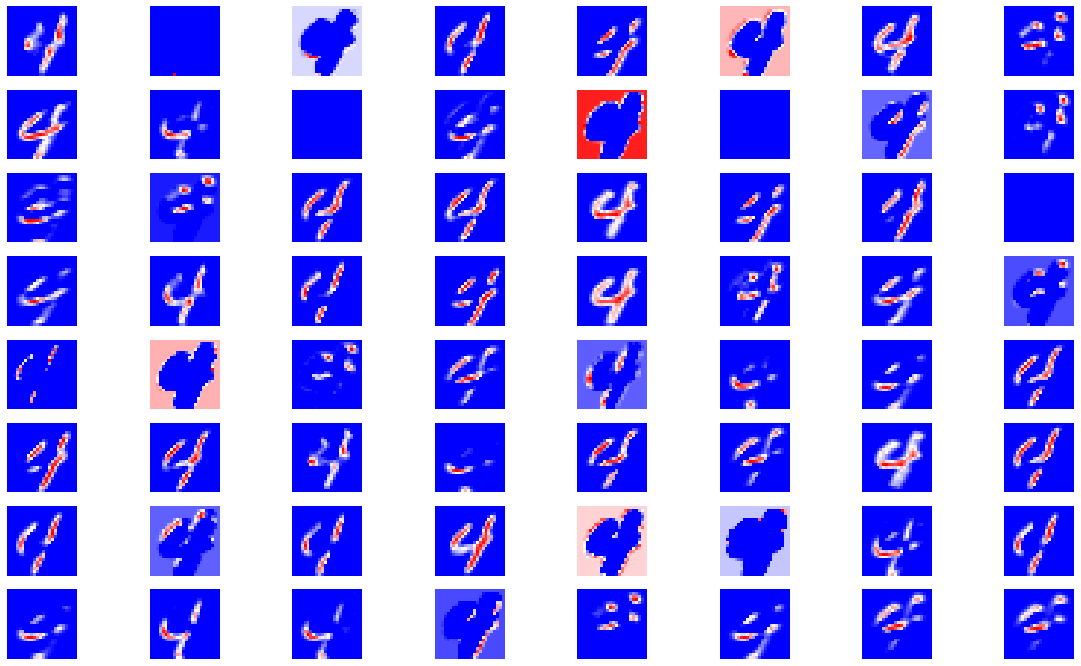

In [0]:
# display activation filter of the second filter
print('Activations values in the second convolutional layer')
display_activation(activations, 8, 8, 1)

# Testing

Testing is the last stage of the learning process. Good practice recommends to do it only once, when you have completely finished with the optimization of the network parameters and hyperparameters.

In [0]:
score = model.evaluate(x_test, keras.utils.to_categorical(y_test, num_classes), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0399488798415674
Test accuracy: 0.988


Correct label is:  5
Predicted label is:  6
Probabilities:  [2.5021185e-10 5.1514986e-12 8.8467872e-10 9.3091318e-10 5.9475104e-07
 4.2103603e-01 5.7605523e-01 2.5674502e-11 2.8964079e-03 1.1758581e-05]


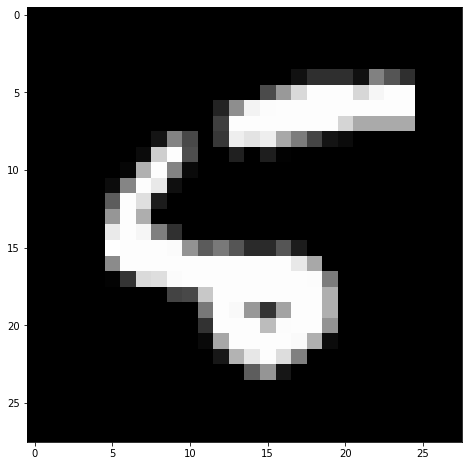

In [0]:
y_predict_proba = model.predict(x_test)

y_predict = np.argmax(y_predict_proba, 1)

diff = y_test != y_predict
x_test_errors = x_test[diff]
y_test_errors = y_test[diff]
y_predict_errors = y_predict[diff]
y_predict_proba_errors = y_predict_proba[diff]

index = 0

print("Correct label is: ", y_test_errors[index])
print("Predicted label is: ", y_predict_errors[index])
print("Probabilities: ", y_predict_proba_errors[index])
plt.imshow(np.squeeze(x_test_errors[index]))

# Experimenting with a more complex database

In the second cell, you can replace:

<code>from keras.datasets import mnist as db</code>

with:

<code>from keras.datasets import fashion_mnist as db</code>

in order to experiment with a more complex database. The best test accuracy reported on this database is 0.967 (see https://github.com/zalandoresearch/fashion-mnist).

You can use the following dictionary to transform number labels into meaningfull labels:

In [0]:
fashion_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
    }

print(fashion_dict[2])

Pullover


## **Competition: Build your own CNN model for fashion MNIST database**

Try to reach the highest validation accuracy. 

Use all of the concepts already presented in theoretical and practical sessions:
* Learning rates.
* Optimizers.
* Dropout.
* Activation functions.
* etc ...

Register your best validation accuracy in the table of Google Sheets :

**Link:** https://tinyurl.com/r9b2xfe

Remember: the best result of the state-of-the-art is 0.967 (see https://github.com/zalandoresearch/fashion-mnist).
